In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import importlib
import config

plt.style.use("ggplot")

try:
    importlib.reload(config) # reload module
except NameError:
    pass

# Load DF

In [19]:
df = pd.read_parquet(config.TRAIN_FILEPATH)
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# EDA

In [20]:
print("DF shape:", {df.shape})

DF shape: {(568630, 30)}


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
v1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
v2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
v3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
v4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
v5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
v6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
v7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
v8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
v9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
v10,568630.0,1.991314e-16,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


Because there are so many samples, we are going to use only a subset of 10.000 samples for EDA purpose to preserve resources.

In [22]:
df_sample_target0 = (df
    .loc[df["target"] == 0]
    .sample(n=5_000, replace=False, random_state=8)
    .assign(target=lambda df_: df_["target"].astype(str))
)
df_sample_target1 = (df
    .loc[df["target"] == 1]
    .sample(n=5_000, replace=False, random_state=8)
    .assign(target=lambda df_: df_["target"].astype(str))
)
df_sample =pd.concat([df_sample_target0, df_sample_target1], axis=0)

Let us see the value distribution.

In [23]:
df_sample

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
29767,-0.432968,-0.424925,1.015536,-0.504451,0.476671,0.402090,0.558646,-0.117615,0.600115,0.529634,...,-0.205811,-0.256572,-0.265408,-0.593993,-0.138696,0.545687,-0.475785,-0.427629,7878.78,0
258349,-0.115918,-0.195393,0.066148,-0.214526,1.177632,-0.324964,0.766096,-0.137965,-0.138979,0.596720,...,0.054228,0.915755,-0.213005,1.564786,-0.481159,-1.035934,0.219650,0.132058,6761.12,0
270631,0.075384,-0.384450,0.555495,-0.960287,0.558236,0.632421,0.835204,-0.143015,0.285200,0.391045,...,-0.006910,0.462481,0.321847,0.676098,-1.618041,0.055372,-0.045736,0.502887,10414.13,0
273855,-0.171346,-0.726041,0.797815,-2.682489,-0.006031,0.664510,0.264016,-0.001878,-0.557469,0.855402,...,-0.196440,-0.632086,0.310546,0.063436,-0.635078,-1.507334,0.044254,0.146409,3248.35,0
224408,-1.125764,0.790305,-0.500761,-0.780867,-0.572982,-0.101987,-0.267135,0.988670,0.125468,0.204806,...,-0.076415,-0.894060,0.229093,1.159276,1.881310,-0.948737,-1.735581,-1.139850,10551.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331661,-0.530978,0.029051,-0.830961,0.221436,-0.702241,0.266455,0.096734,0.165240,0.196345,-0.769702,...,0.148368,0.598638,-0.034157,-1.106440,-1.555921,-1.159627,0.437857,-0.966560,4139.53,1
395855,-0.347046,-0.152991,-0.646312,0.726540,-0.433158,-0.375636,-0.357678,0.059966,-0.944222,-0.901985,...,0.344864,-0.369449,-0.281445,-0.486653,0.666626,1.988556,0.890343,1.240835,794.89,1
437919,1.042691,-0.284531,0.349028,-0.177531,0.405986,0.328038,0.462506,-0.161594,0.531679,0.445790,...,-0.131936,-0.159838,-0.193444,-1.269809,1.058006,-0.625477,-0.189868,-0.018443,11074.41,1
298062,-0.812210,-1.051716,-0.669762,0.258339,-0.450094,0.675728,-0.272928,0.271119,-0.012693,-0.726079,...,0.283370,0.870164,-0.605244,-2.051047,-0.707905,-0.137300,1.164424,-1.982068,3787.89,1


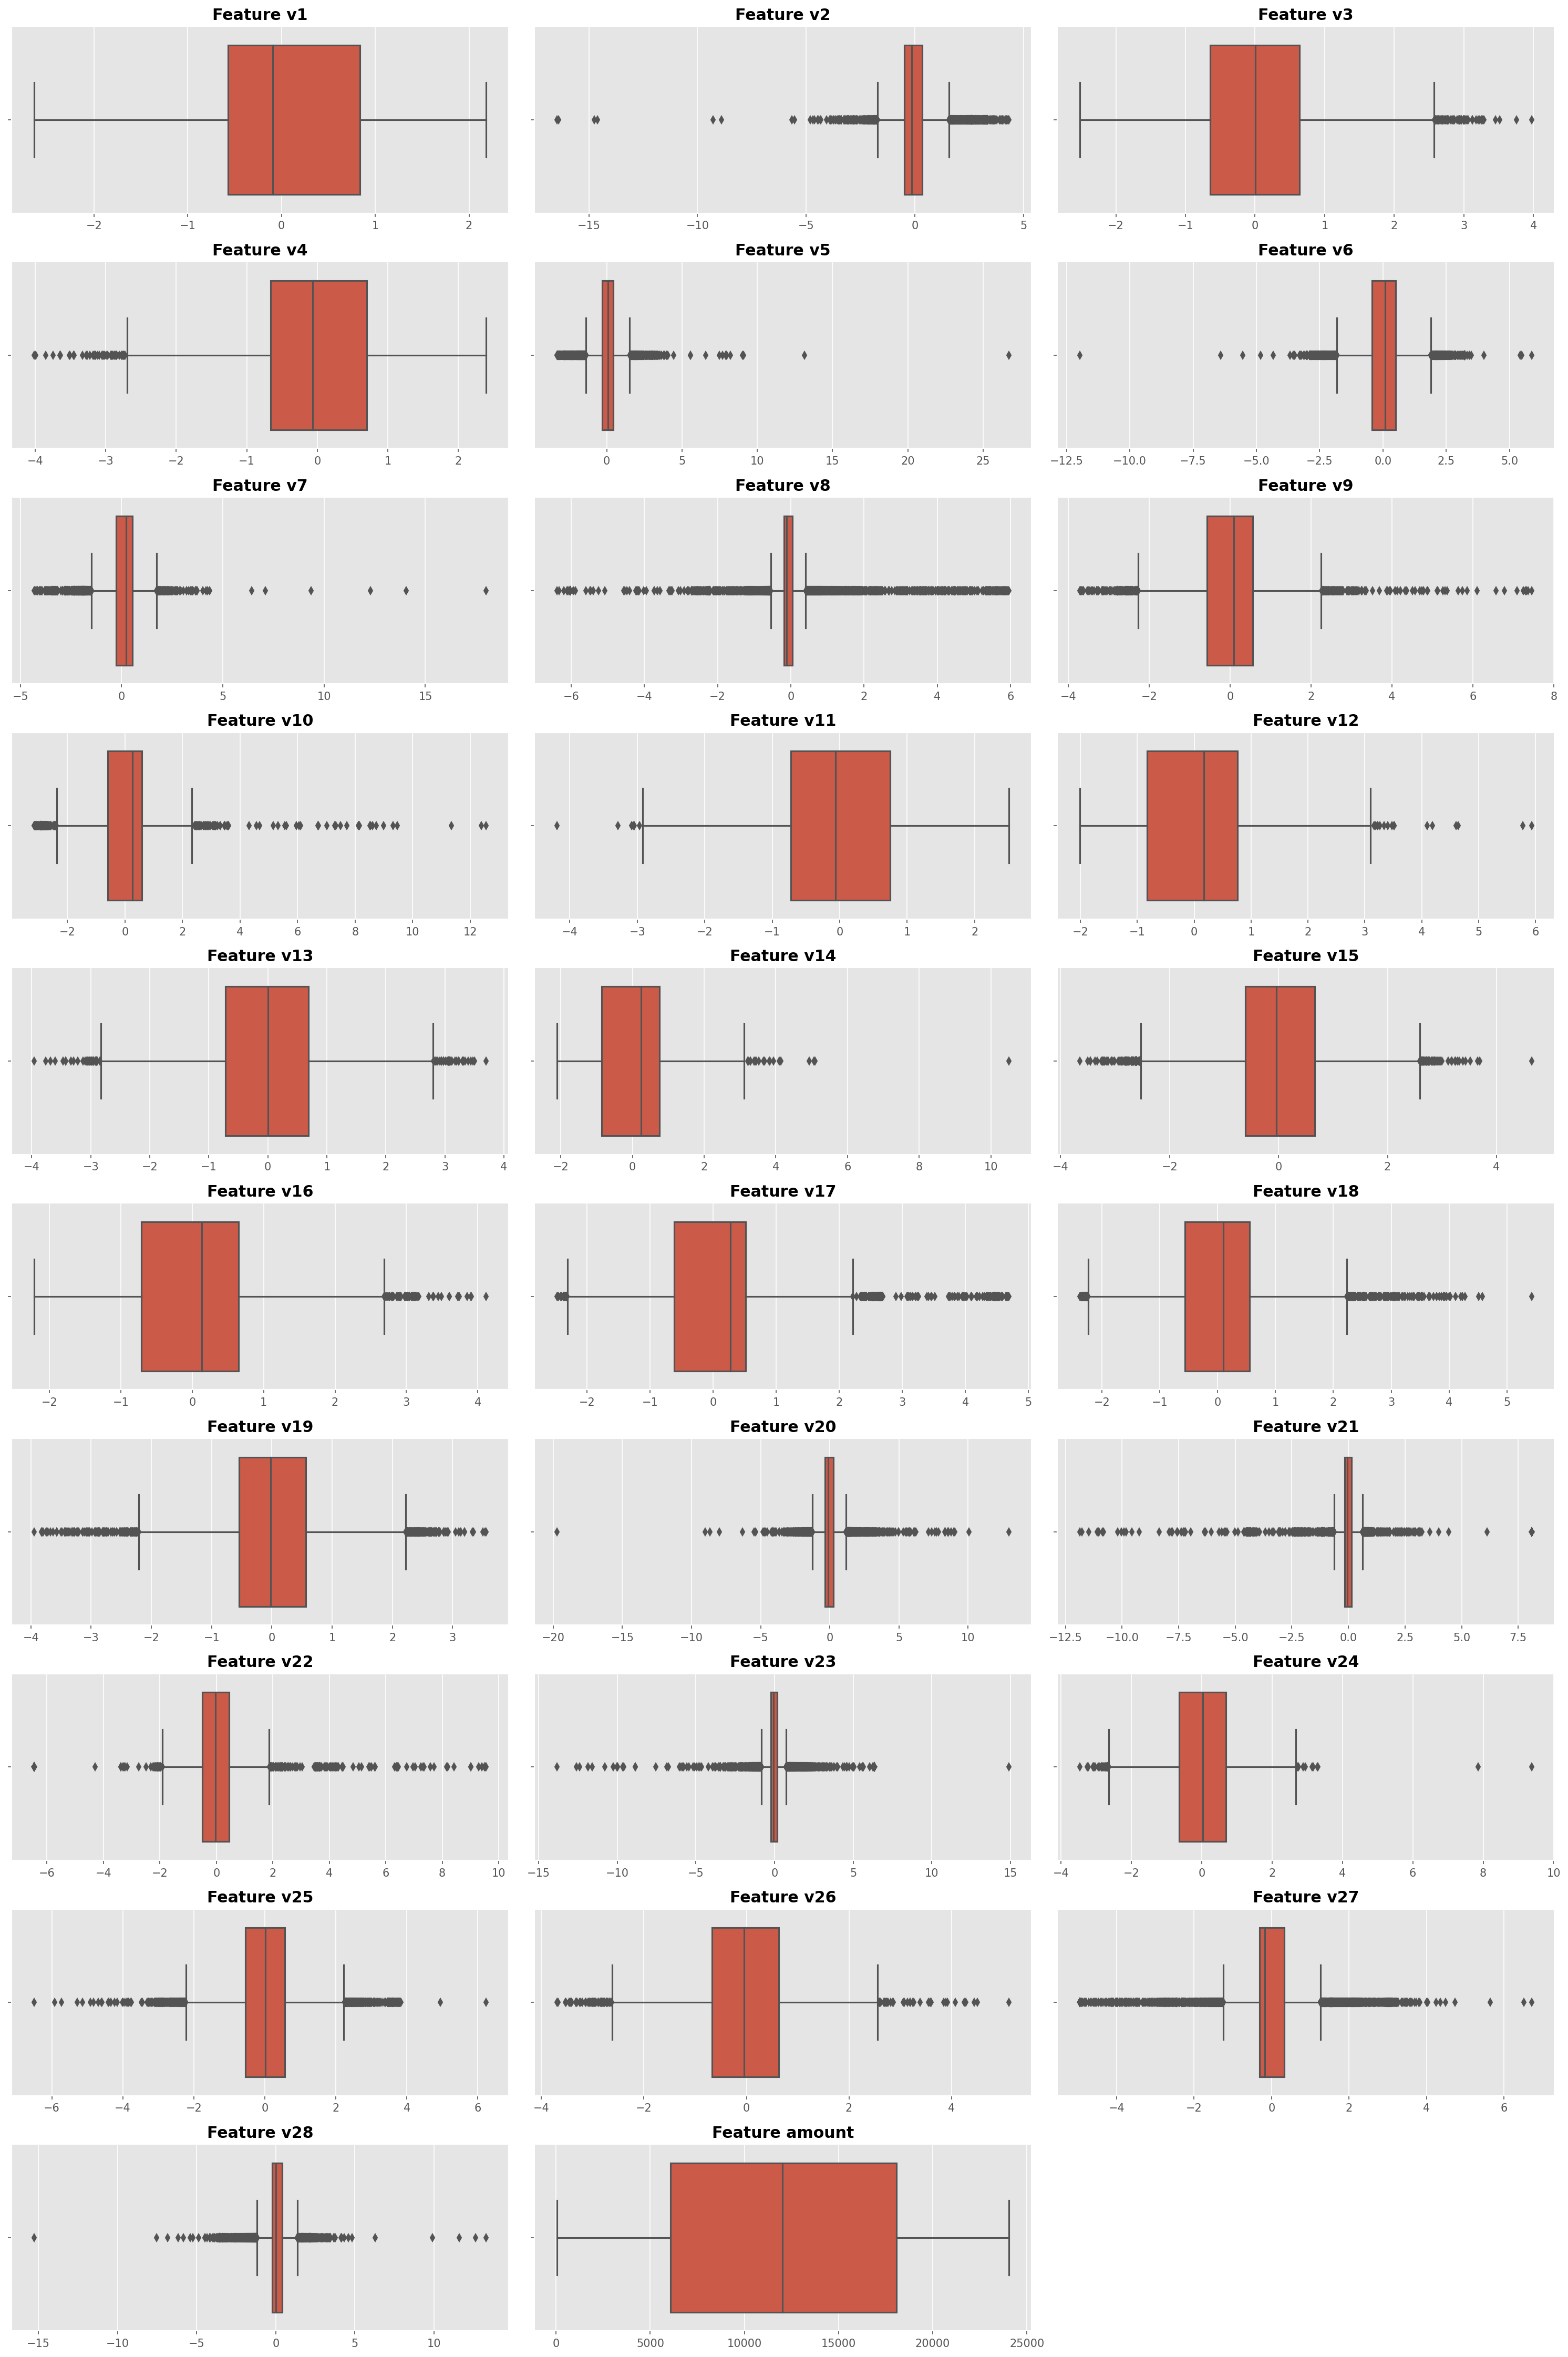

In [24]:
fig = plt.figure(figsize=(20, 30), dpi=150)
n_cols = 3
n_rows = int(np.ceil(df_sample.shape[-1] / n_cols))

for (i, col) in enumerate(df_sample.columns, start=1):
    if col == "target":
        continue
    ax = plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_sample, x=col, ax=ax)
    ax.set_title(f"Feature {col}", fontweight="bold")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()

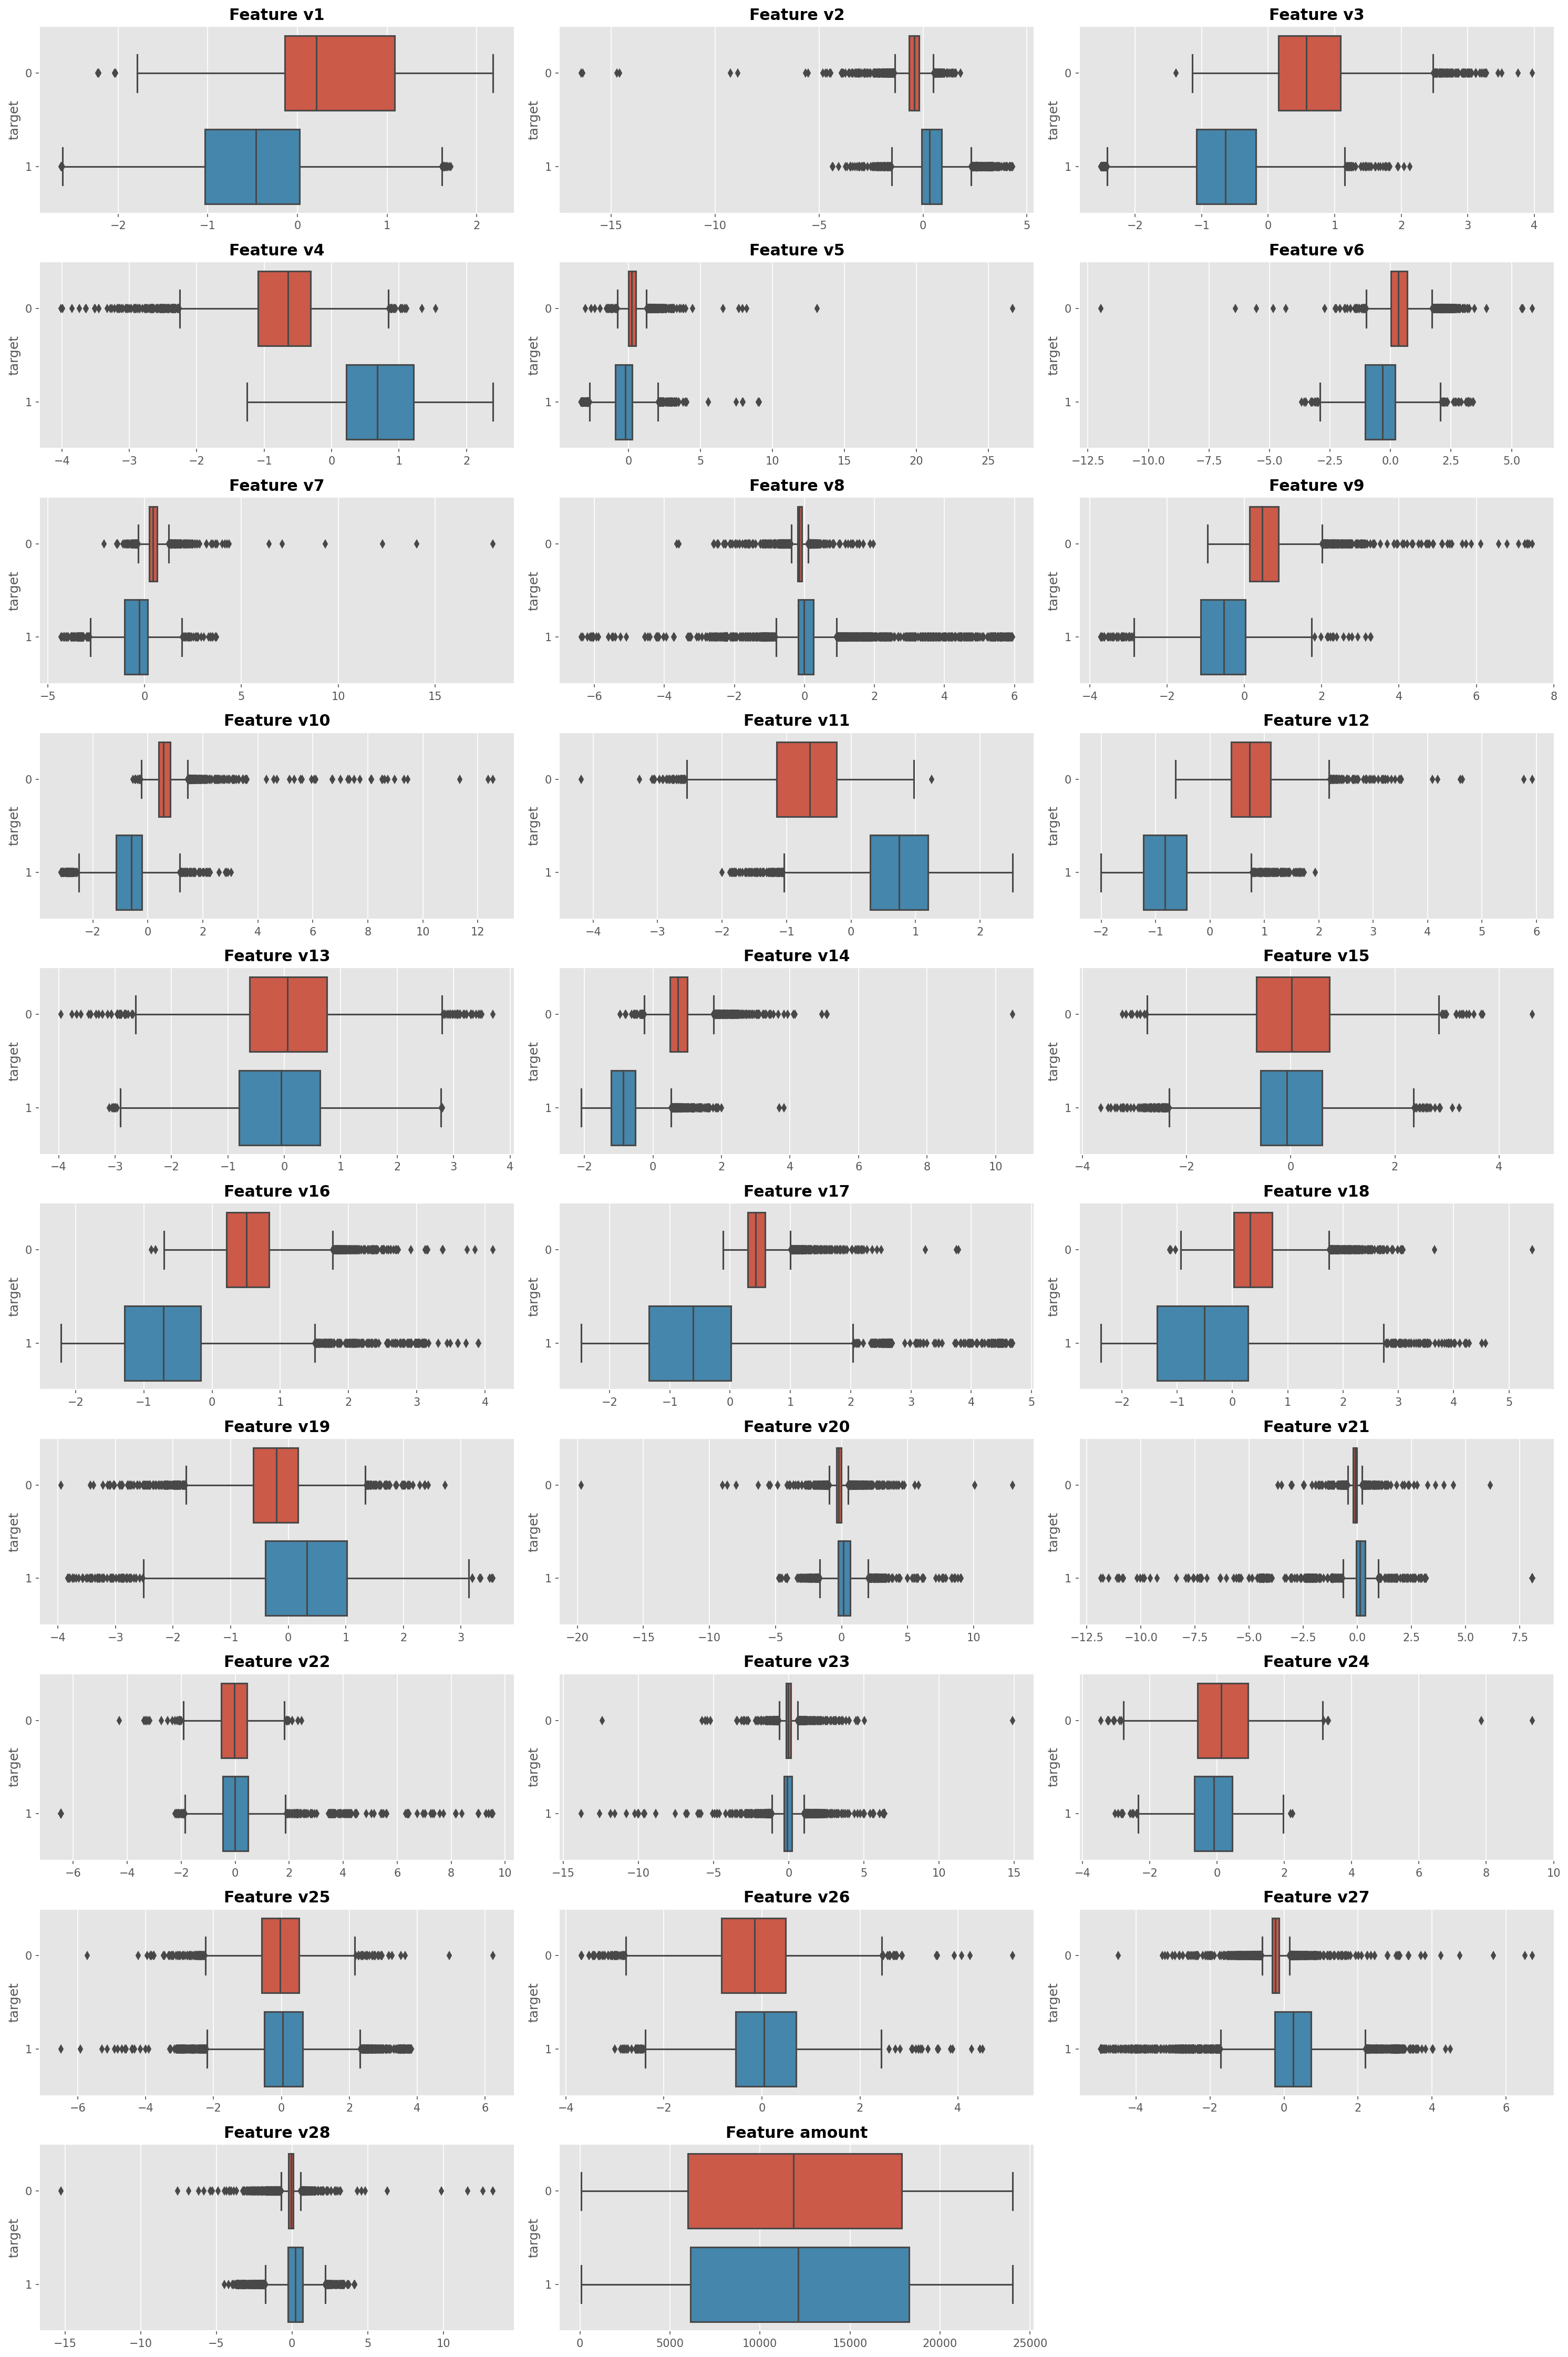

In [26]:
fig = plt.figure(figsize=(20, 30), dpi=150)
n_cols = 3
n_rows = int(np.ceil(df_sample.shape[-1] / n_cols))

for (i, col) in enumerate(df_sample.columns, start=1):
    if col == "target":
        continue
    ax = plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_sample, x=col, y="target", ax=ax)
    ax.set_title(f"Feature {col}", fontweight="bold")
    ax.set_xlabel("")
plt.tight_layout()
plt.show()

Checking correlation between features.

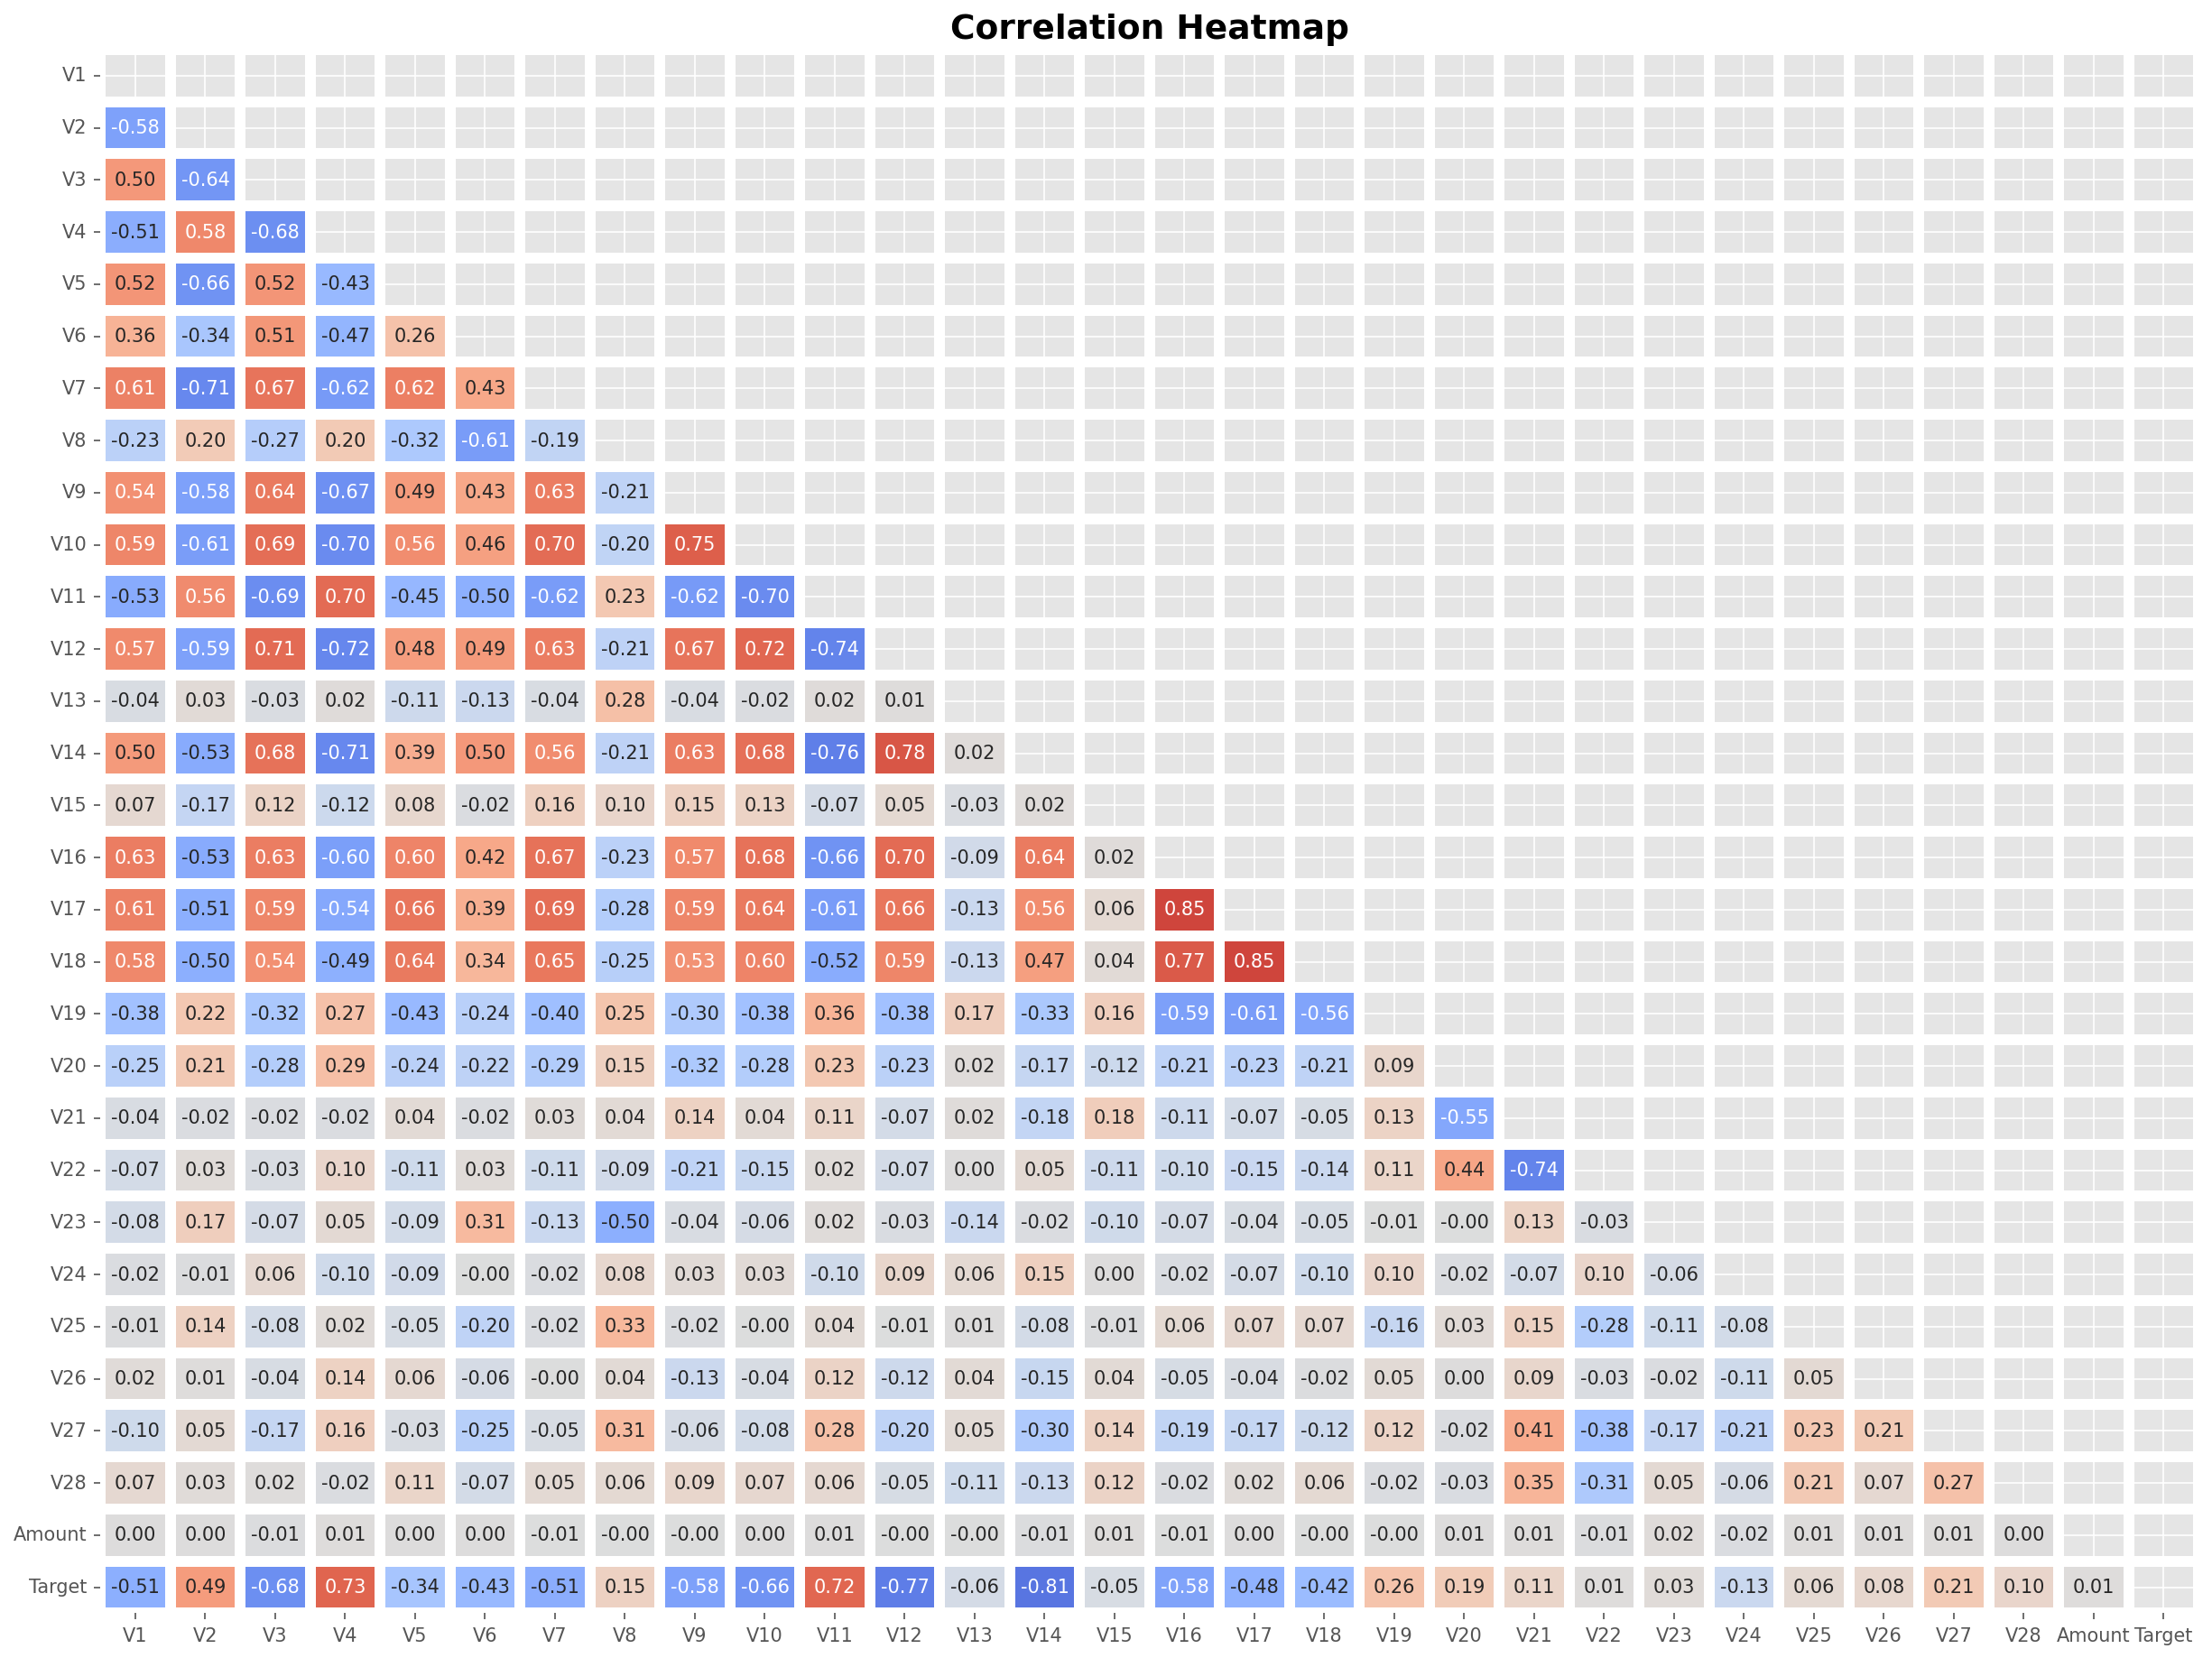

In [27]:
def create_corr_heatmap(data: pd.DataFrame):
    """Create a heatmap showing the correlation between features

    Arguments:
        data -- a DF containing the correlation
    """

    fig, ax = plt.subplots(figsize=(20, 15), dpi= 150)

    mask = np.triu(np.ones_like(data, dtype = bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    sns.heatmap(
        data = data, 
        mask = mask, 
        annot= True, 
        fmt= ".2f", 
        cmap= cmap, 
        linewidths= 5,
        vmin=-1, vmax=1, 
        cbar= False,
        ax=ax
    )

    yticks = [i.title() for i in data.index]
    xticks = [i.title() for i in data.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    plt.title("Correlation Heatmap", fontsize=18, fontweight="bold")
    plt.show()

create_corr_heatmap(df_sample.astype(float).corr())

In [31]:
list(df.columns)

['v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'amount',
 'target']